# Importing Libraries and downloading dataset

In [177]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler, RobustScaler,OneHotEncoder
from sklearn.model_selection import cross_val_score,train_test_split,cross_validate
from sklearn.metrics import accuracy_score,root_mean_squared_error,r2_score,mean_absolute_error,mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [112]:
# Função para exibir informações sobre o dataset
def info(df):
    # Número de instâncias no dataset
    num_instances = df.shape[0]

    # Número de países diferentes
    num_countries = df["Country"].nunique()
    un_countries = df["Country"].unique()

    # Número de anos diferentes
    num_years = df["Year"].nunique()
    un_years = df["Year"].unique()

    # Número de instâncias por país
    country_counts = df["Country"].value_counts()

    # Número de instâncias por ano por país
    instances_per_year_country = df.groupby(["Country", "Year"]).size().reset_index(name="Instances")

    # Exibição das informações
    print(f"1. Total number of instances (rows) in the dataset: {num_instances}")
    print(f"2. Number of different countries: {num_countries}")
    print(un_countries)
    print(f"\n3. Number of different years: {num_years}")
    print(un_years)
    print(f"\n4. Number of instances for each country:")
    print(country_counts)
    print(f"\n5. Number of instances per year per country:")
    print(instances_per_year_country)


path = kagglehub.dataset_download("kumarajarshi/life-expectancy-who")
print("Path to dataset files:", path)
data_path = f"{path}/Life Expectancy Data.csv"
df = pd.read_csv(data_path)
df.columns = df.columns.str.strip()

%matplotlib inline

sns.set_theme(style="whitegrid")

info(df)

Path to dataset files: /home/vitor/.cache/kagglehub/datasets/kumarajarshi/life-expectancy-who/versions/1
1. Total number of instances (rows) in the dataset: 2938
2. Number of different countries: 193
['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia (Plurinational State of)' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' "Côte d'Ivoire" 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Cook Islands' 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia'
 "Democratic People's Republic of Korea"
 'Democratic Republic of the Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea'
 'Eritrea' 'Estonia' 'Ethiopia' 'Fiji' 'Finland' 'France' 

In [27]:
num_col=[]
cat_col=[]
for col in df.columns:
    if df[col].dtype=='object':
        cat_col.append(col)
    else:
        num_col.append(col) 
print(cat_col)
print(num_col)
print(len(cat_col)+len(num_col))        

['Country', 'Status']
['Year', 'Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI', 'under-five deaths', 'Polio', 'Total expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population', 'thinness  1-19 years', 'thinness 5-9 years', 'Income composition of resources', 'Schooling']
22


# PCA

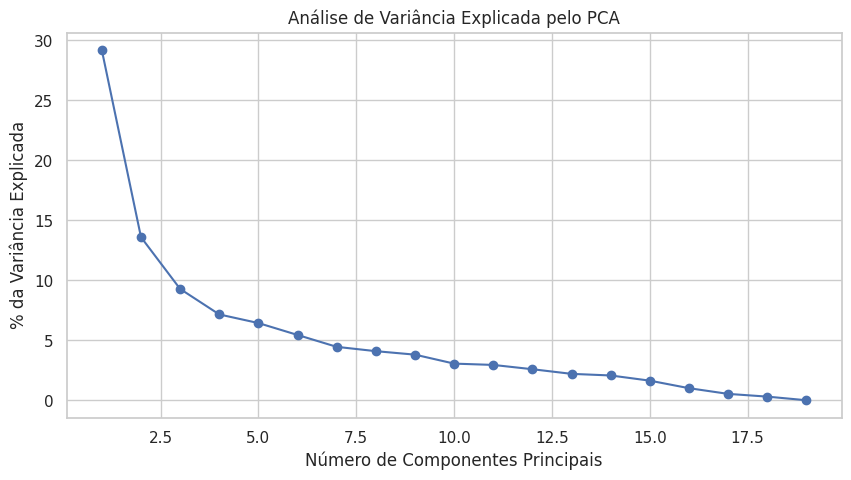

In [236]:
df_pca = df.copy()
numeric_cols = df_pca.select_dtypes(include=['float64', 'int64']).columns
df_pca[numeric_cols] = df_pca[numeric_cols].fillna(df[numeric_cols].mean())

numeric_cols = df_pca.select_dtypes(include='number').columns
numeric_cols = numeric_cols[numeric_cols != 'Life expectancy']
df_numeric = df_pca[numeric_cols]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

pca = PCA()
pca.fit(df_scaled)
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance * 100, marker='o')
plt.xlabel("Número de Componentes Principais")
plt.ylabel("% da Variância Explicada")
plt.title("Análise de Variância Explicada pelo PCA")

df_pca = pca.transform(df_scaled)

In [237]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(pca.components_))], index=numeric_cols)

print("Tabela de Loadings do PCA com Gradiente de Cores:")
styled_loadings = loadings.style.background_gradient(cmap='coolwarm', axis=None)
styled_loadings

Tabela de Loadings do PCA com Gradiente de Cores:


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

# Missing Values

In [239]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

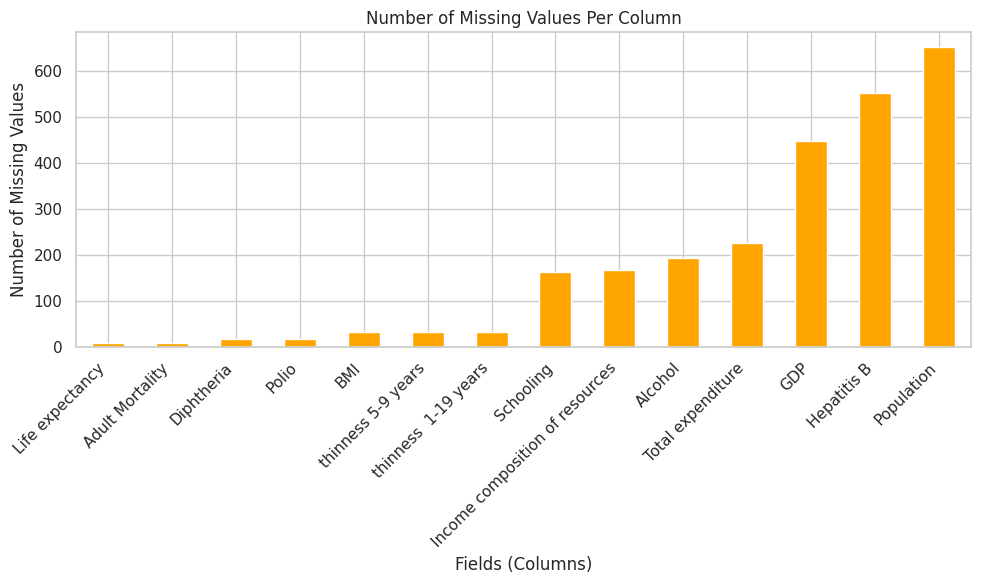

In [240]:
# Gráfico do número de valores ausentes por coluna
plt.figure(figsize=(10, 6))
missing_data = df.isnull().sum().sort_values(ascending=True)
missing_data[missing_data > 0].plot(kind="bar", color="orange")
plt.title("Number of Missing Values Per Column")
plt.xlabel("Fields (Columns)")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Number of Missing Values")
plt.tight_layout()

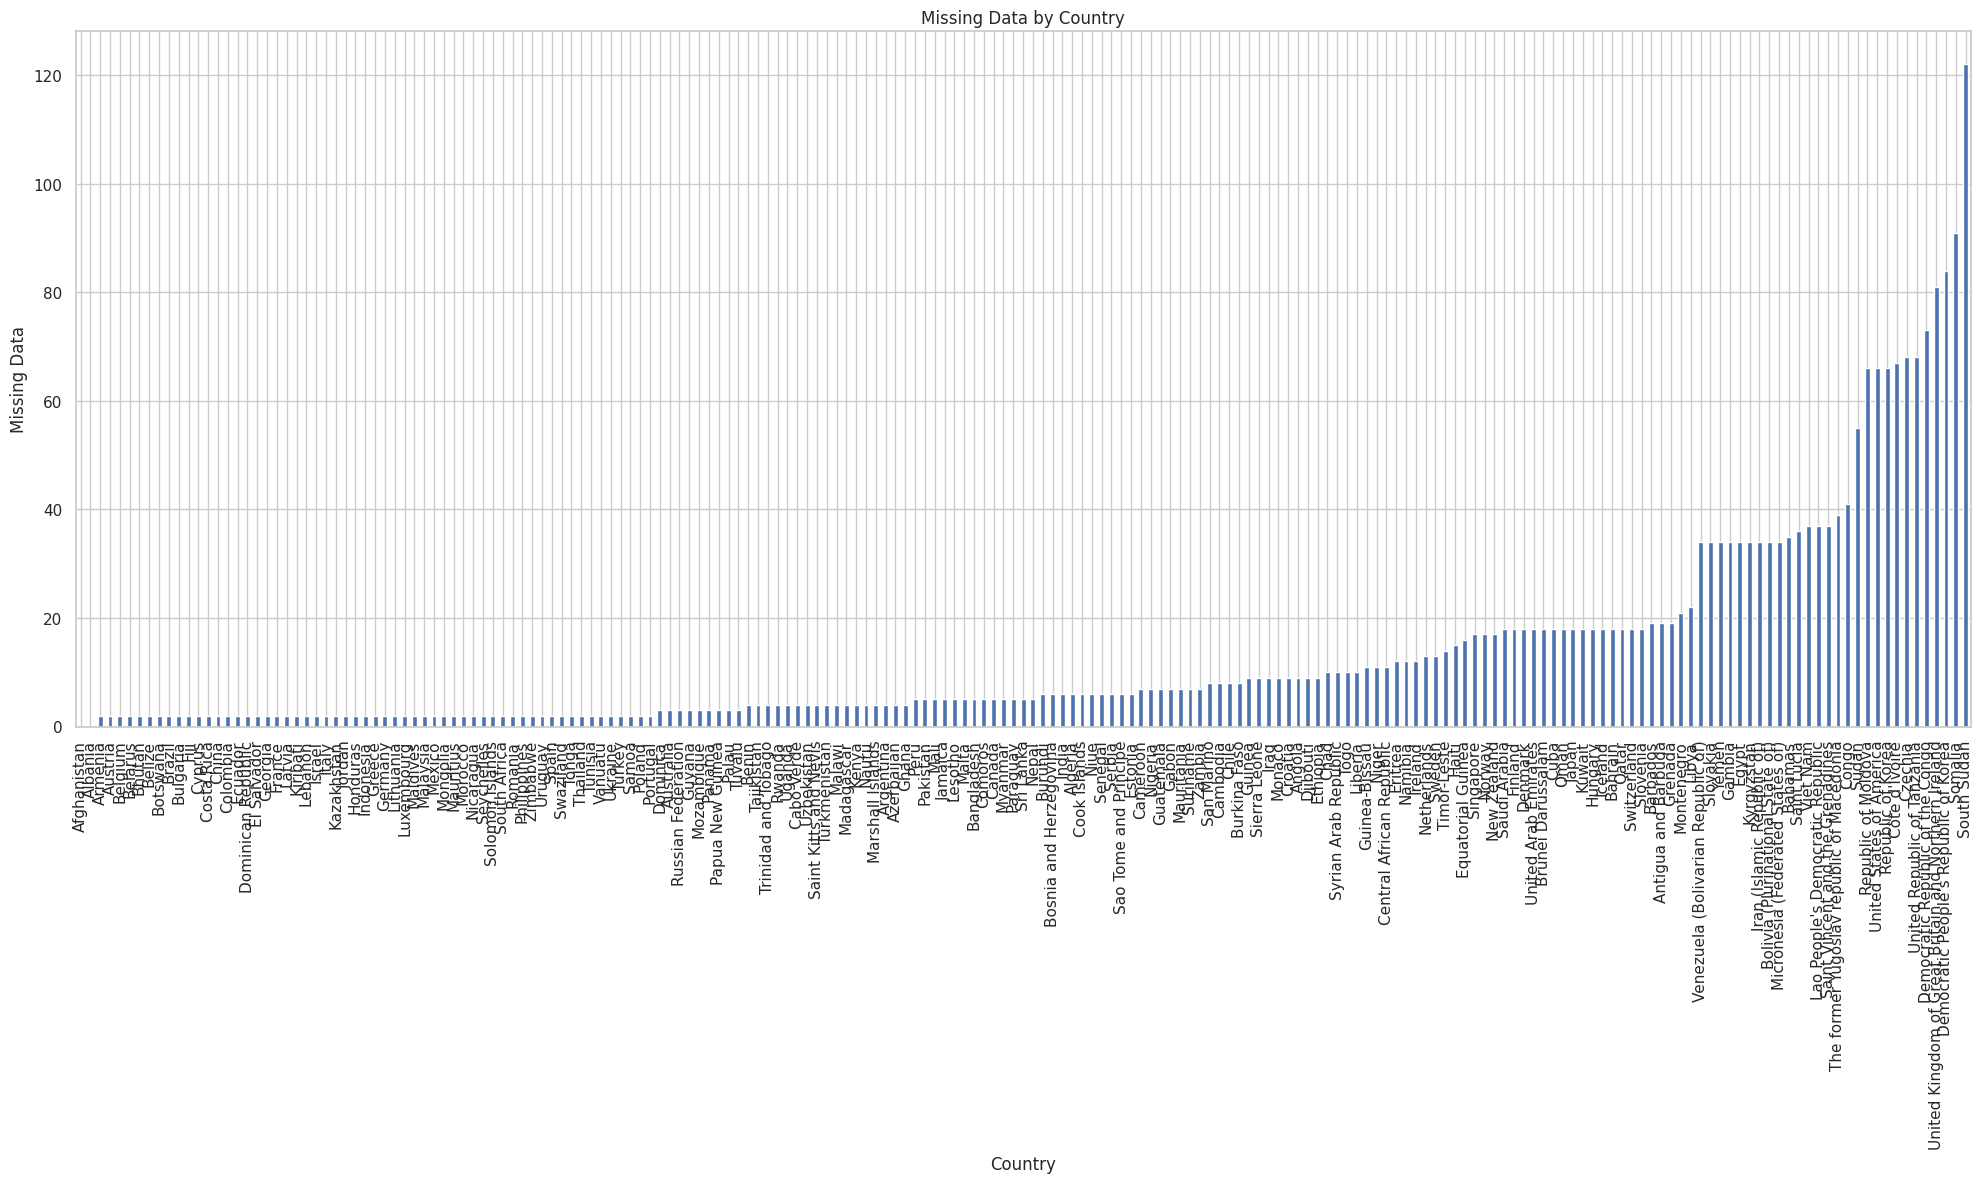

In [241]:
missing_data_per_country = df.isnull().groupby(df["Country"]).sum().sum(axis=1)
missing_data_per_country = missing_data_per_country.sort_values()
plt.figure(figsize=(20, 12))
missing_data_per_country.plot(kind="bar")
plt.title("Missing Data by Country")
plt.xlabel("Country")
plt.ylabel("Missing Data")
plt.tight_layout()

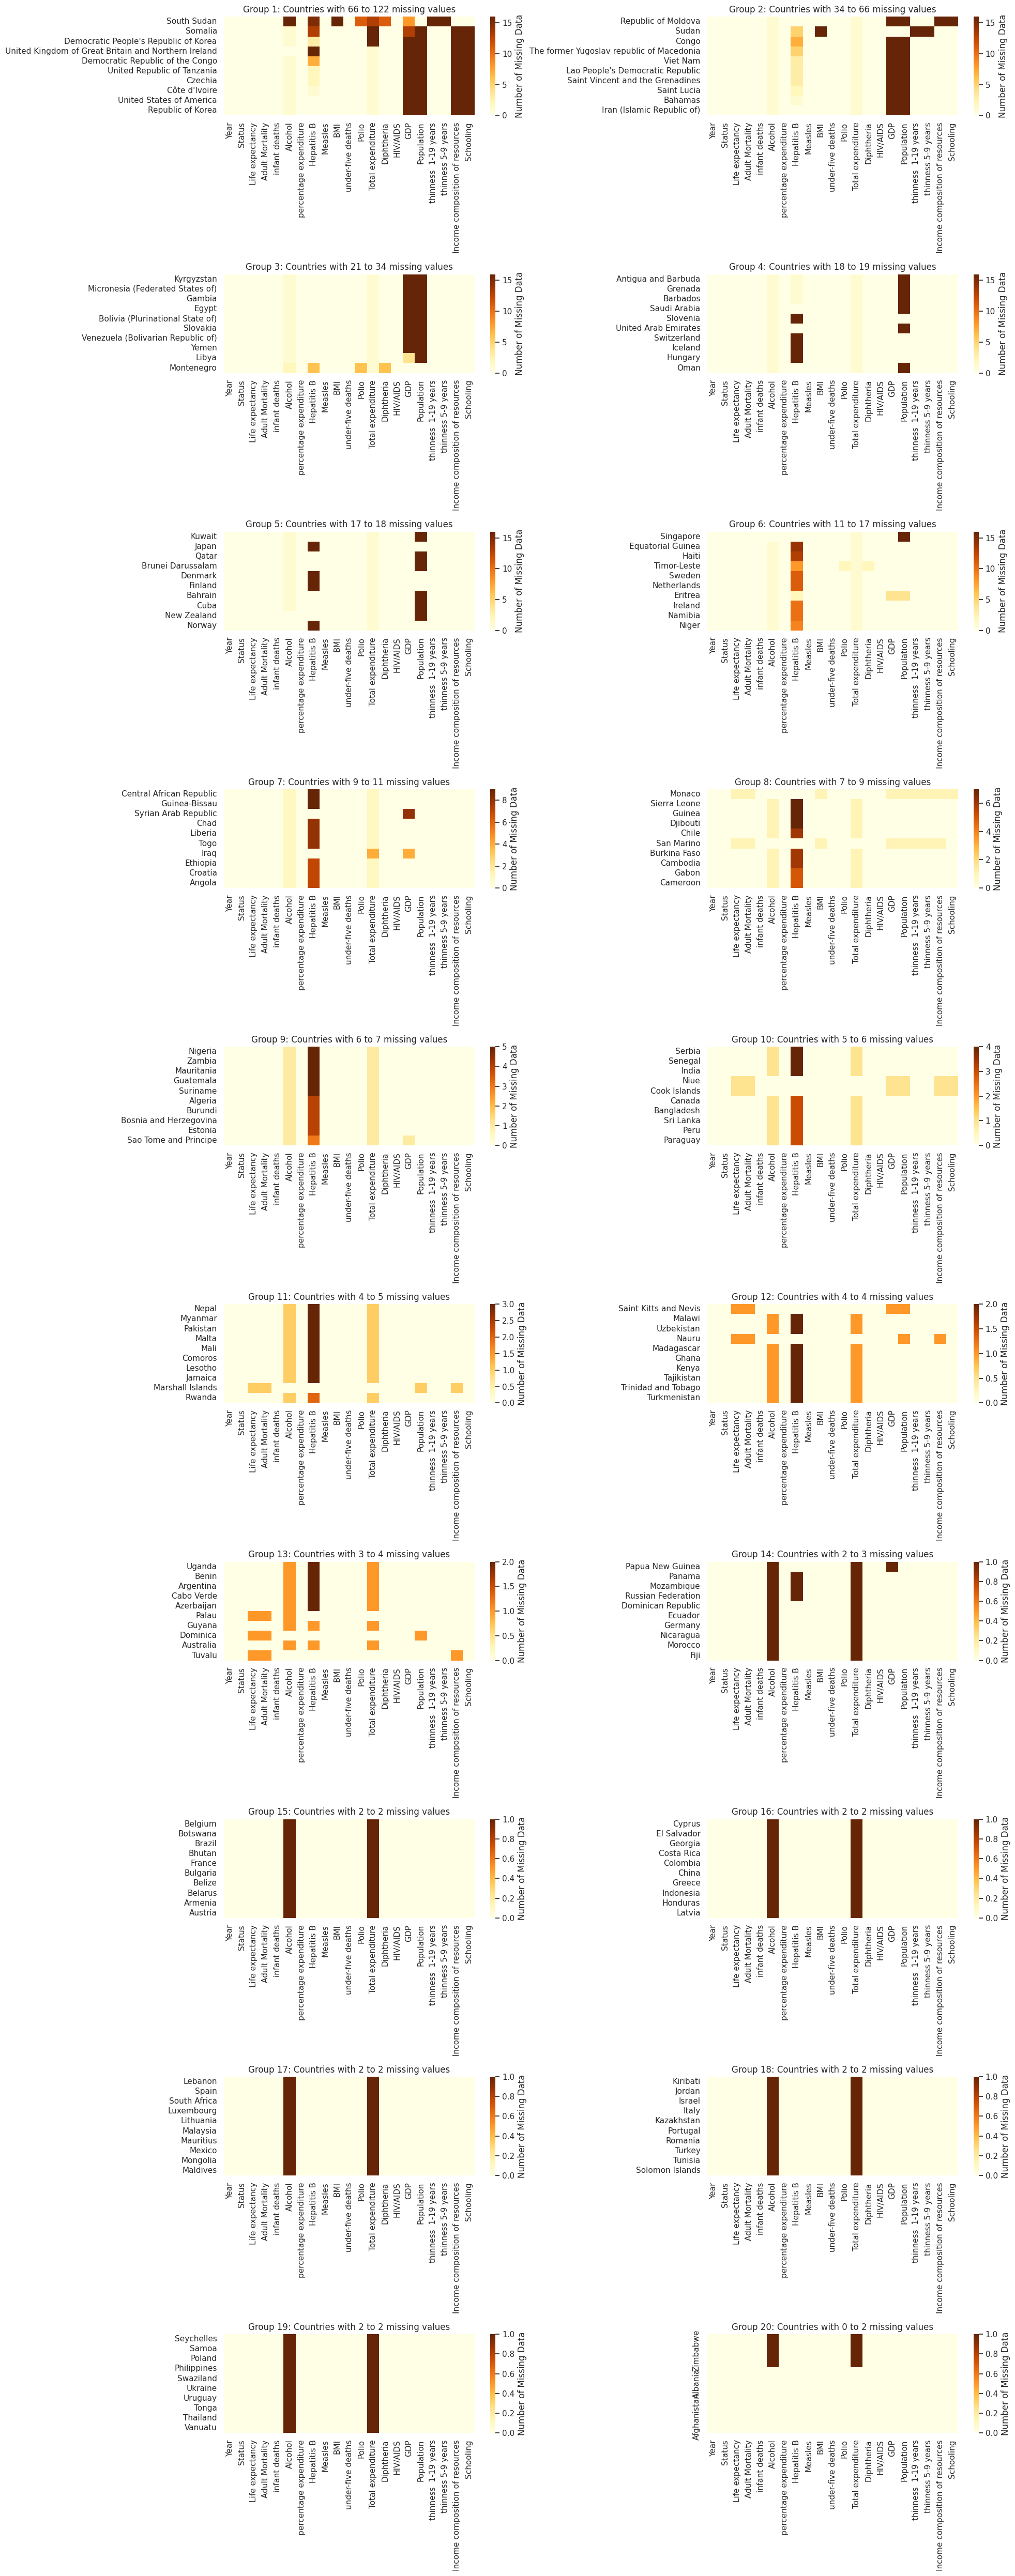

In [242]:
n_countries_per_group=10

missing_data_per_country = df.isnull().groupby(df["Country"]).sum()
missing_data_per_country["total_missing"] = missing_data_per_country.sum(axis=1)
missing_data_per_country = missing_data_per_country.sort_values(by="total_missing", ascending=False)

n_countries = len(missing_data_per_country)
n_groups = int(np.ceil(n_countries / n_countries_per_group))
n_rows = int(np.ceil(n_groups / 2))

# Configurar o layout dos subplots
fig = plt.figure(figsize=(20, 5*n_rows))  # Aumentada a largura para acomodar 2 colunas

for i in range(n_groups):
    # Selecionar os países para o grupo atual
    start_idx = i * n_countries_per_group
    end_idx = min((i + 1) * n_countries_per_group, n_countries)
    group_data = missing_data_per_country.iloc[start_idx:end_idx].drop(columns=["total_missing", "Country"])
    
    
    ax = plt.subplot(n_rows, 2, i+1)
    sns.heatmap(group_data,
                cmap="YlOrBr",
                cbar_kws={"label": "Number of Missing Data"},
                ax=ax)
    
    ax.set_ylabel("")
    total_missing = missing_data_per_country["total_missing"].iloc[start_idx:end_idx]
    title = f"Group {i+1}: Countries with {int(total_missing.min())} to {int(total_missing.max())} missing values"
    ax.set_title(title)

plt.tight_layout()

# Life expectancy

/tmp/ipykernel_23106/813103711.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='Life expectancy', ci=None, ax=axes[1,0])
/tmp/ipykernel_23106/813103711.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='Life expectancy', hue='Status', ci=None, ax=axes[1,1])


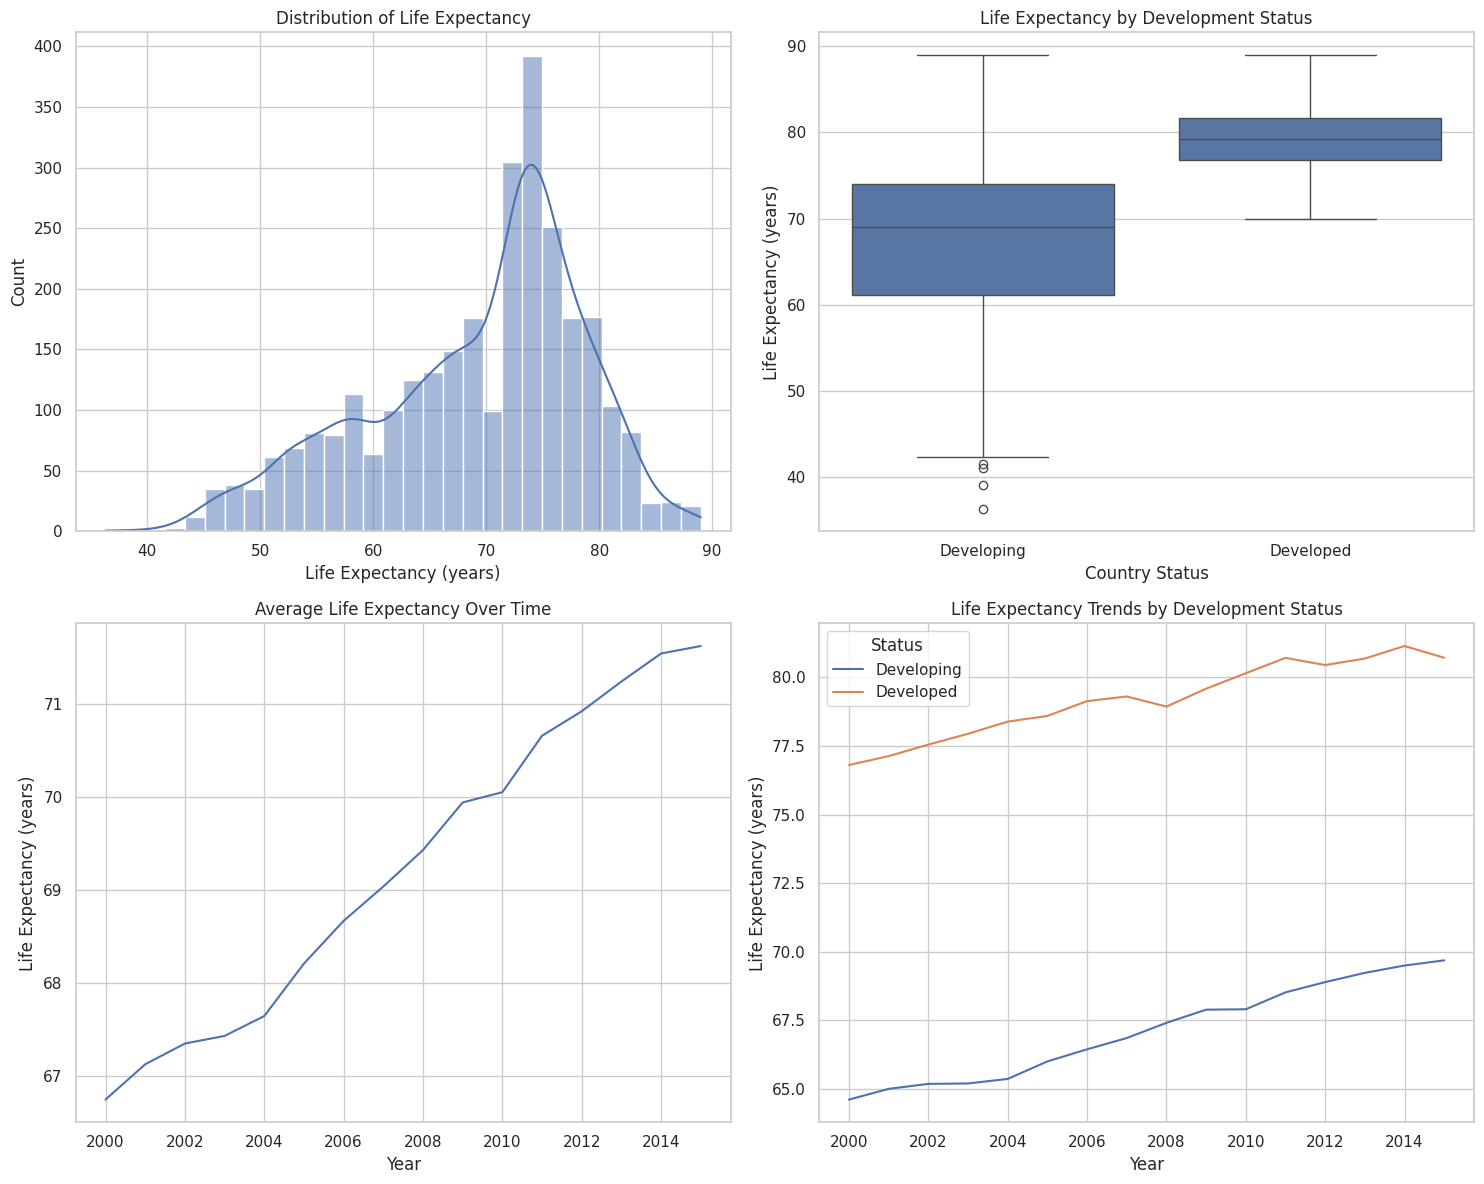

In [243]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

sns.histplot(data=df, x='Life expectancy', kde=True, ax=axes[0,0])
axes[0,0].set_title('Distribution of Life Expectancy')
axes[0,0].set_xlabel('Life Expectancy (years)')

sns.boxplot(data=df, x='Status', y='Life expectancy', ax=axes[0,1])
axes[0,1].set_title('Life Expectancy by Development Status')
axes[0,1].set_xlabel('Country Status')
axes[0,1].set_ylabel('Life Expectancy (years)')

sns.lineplot(data=df, x='Year', y='Life expectancy', ci=None, ax=axes[1,0])
axes[1,0].set_title('Average Life Expectancy Over Time')
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Life Expectancy (years)')

sns.lineplot(data=df, x='Year', y='Life expectancy', hue='Status', ci=None, ax=axes[1,1])
axes[1,1].set_title('Life Expectancy Trends by Development Status')
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('Life Expectancy (years)')

plt.tight_layout()

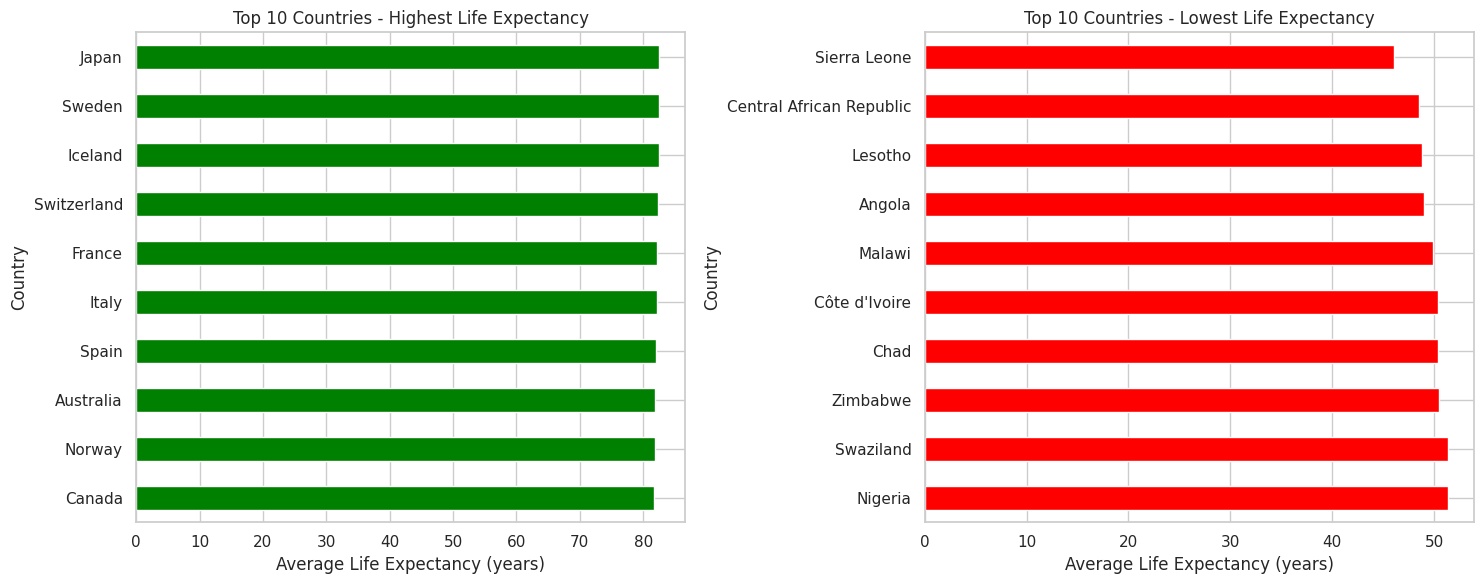

In [244]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

top_10 = df.groupby('Country')['Life expectancy'].mean().nlargest(10).sort_values(ascending=True)
top_10.plot(kind='barh', ax=ax1, color='green')
ax1.set_title('Top 10 Countries - Highest Life Expectancy')
ax1.set_xlabel('Average Life Expectancy (years)')

bottom_10 = df.groupby('Country')['Life expectancy'].mean().nsmallest(10).sort_values(ascending=False)
bottom_10.plot(kind='barh', ax=ax2, color='red')
ax2.set_title('Top 10 Countries - Lowest Life Expectancy')
ax2.set_xlabel('Average Life Expectancy (years)')

plt.tight_layout()

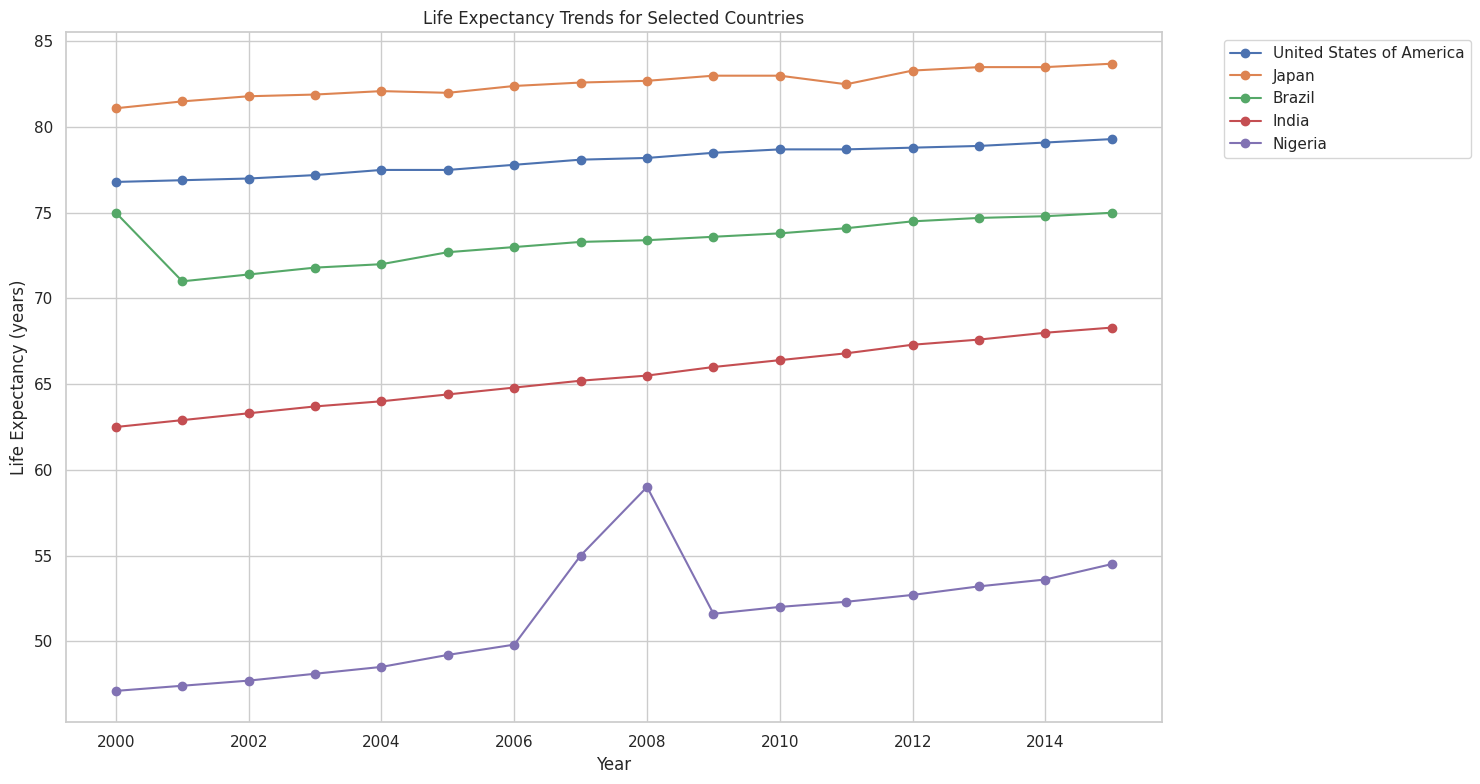

In [245]:
country_list = ['United States of America', 'Japan', 'Brazil', 'India', 'Nigeria']

plt.figure(figsize=(15, 8))
for country in country_list:
    country_data = df[df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Life expectancy'], marker='o', label=country)

plt.title('Life Expectancy Trends for Selected Countries')
plt.xlabel('Year')
plt.ylabel('Life Expectancy (years)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Variables

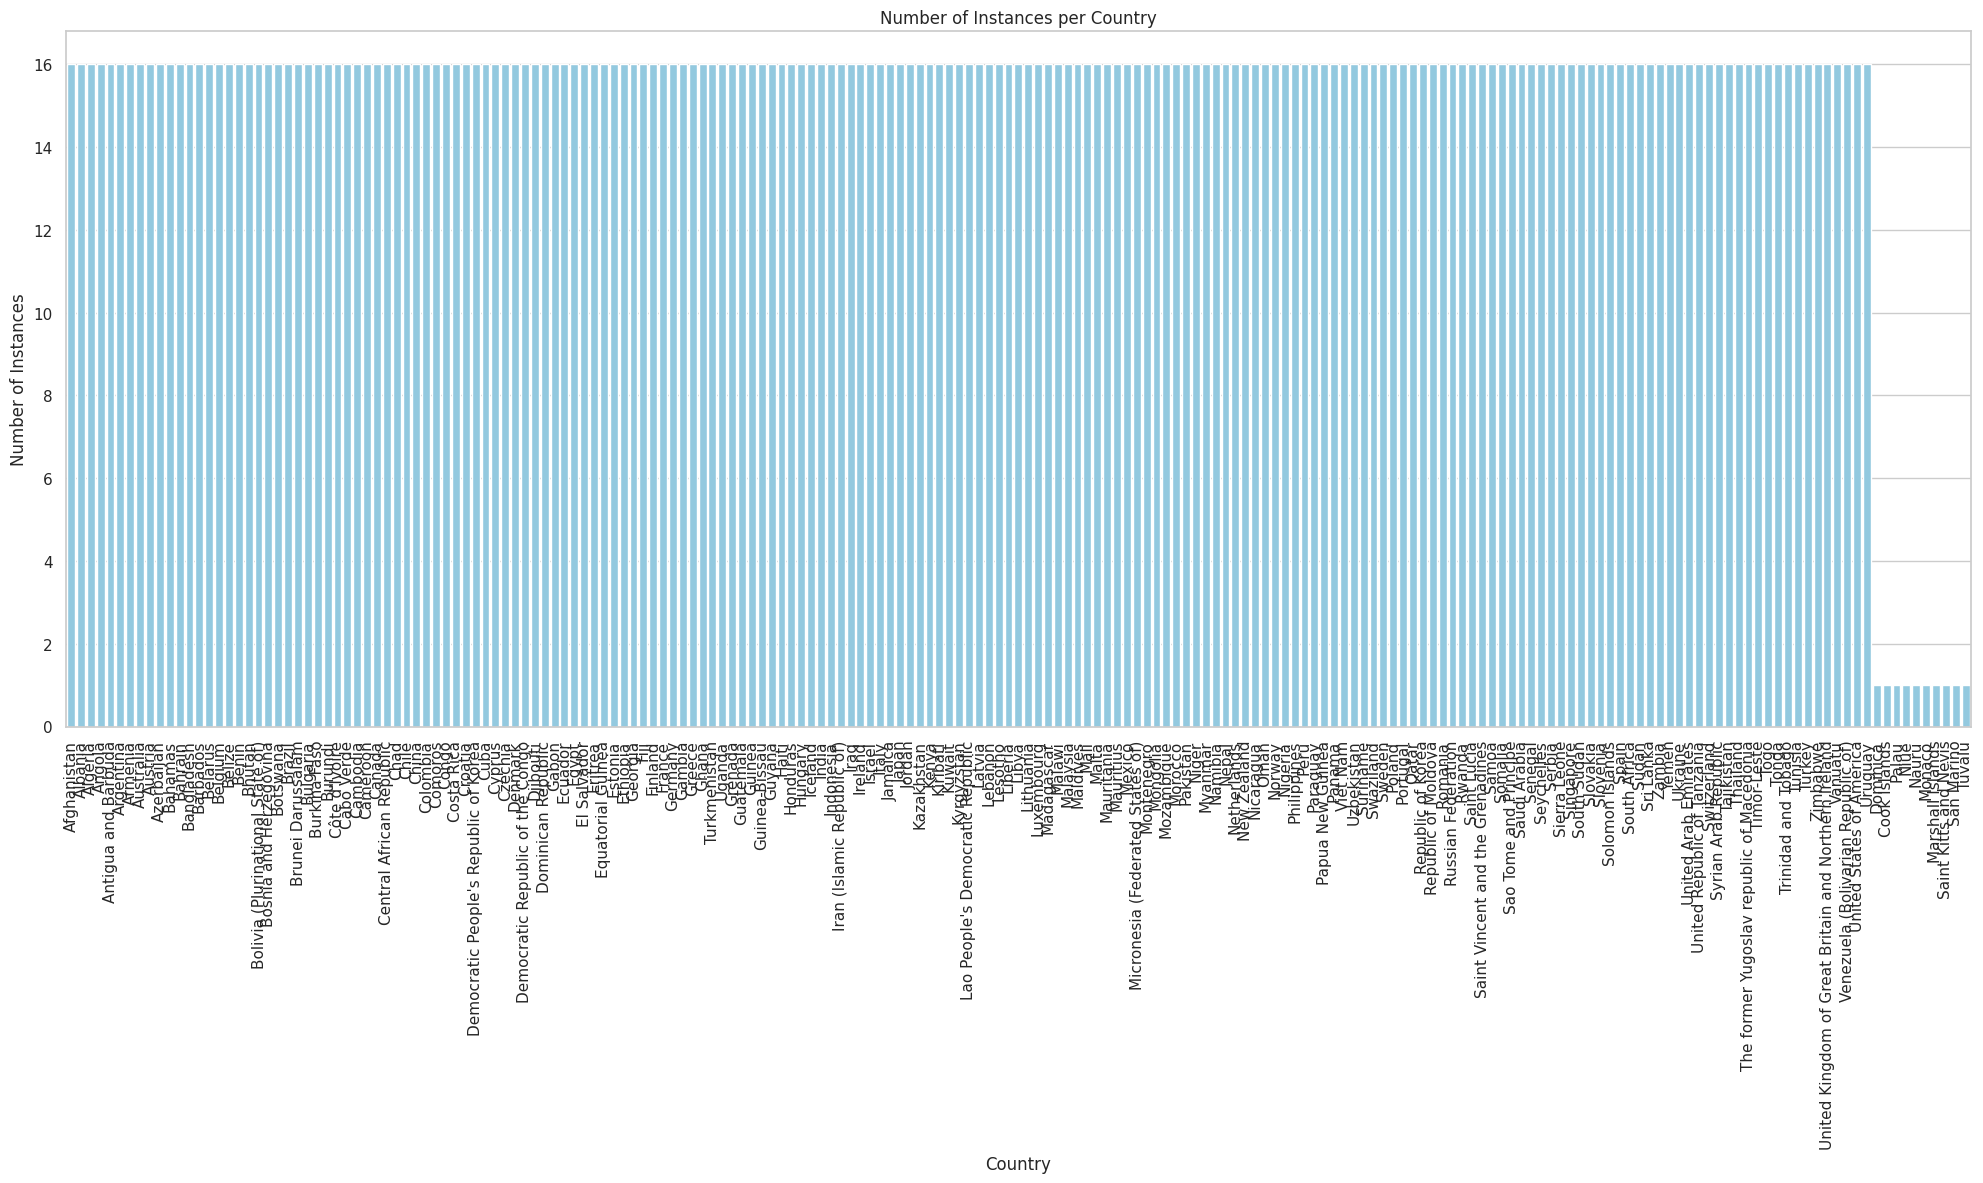

In [246]:
country_counts = df["Country"].value_counts()
plt.figure(figsize=(20, 12))
sns.barplot(x=country_counts.index, y=country_counts.values, color="skyblue")
plt.title("Number of Instances per Country")
plt.xlabel("Country")
plt.ylabel("Number of Instances")
plt.xticks(rotation=90)
plt.tight_layout()

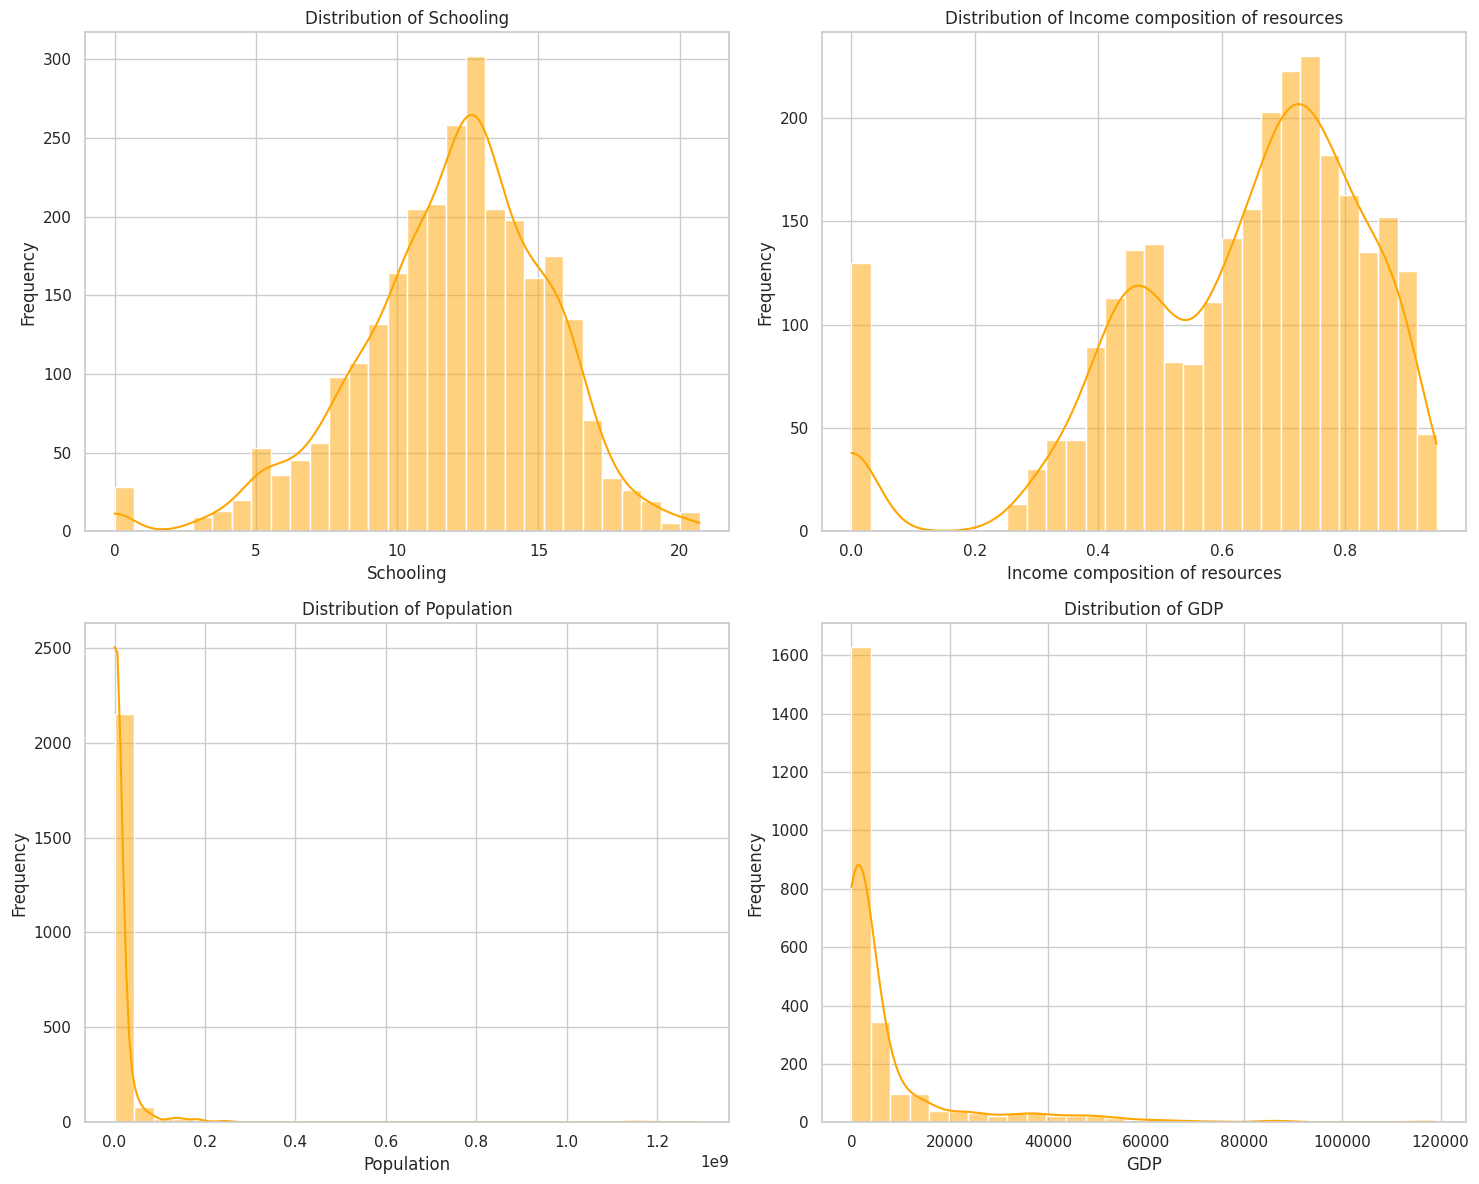

In [247]:
columns = ['Schooling', 'Income composition of resources', 'Population', 'GDP']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
axes = axes.ravel()

for idx, column in enumerate(columns):
    sns.histplot(data=df, kde=True, bins=30, color="orange", x=column, ax=axes[idx])
    axes[idx].set_title(f'Distribution of {column}')
    axes[idx].set_xlabel(f'{column}')
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()

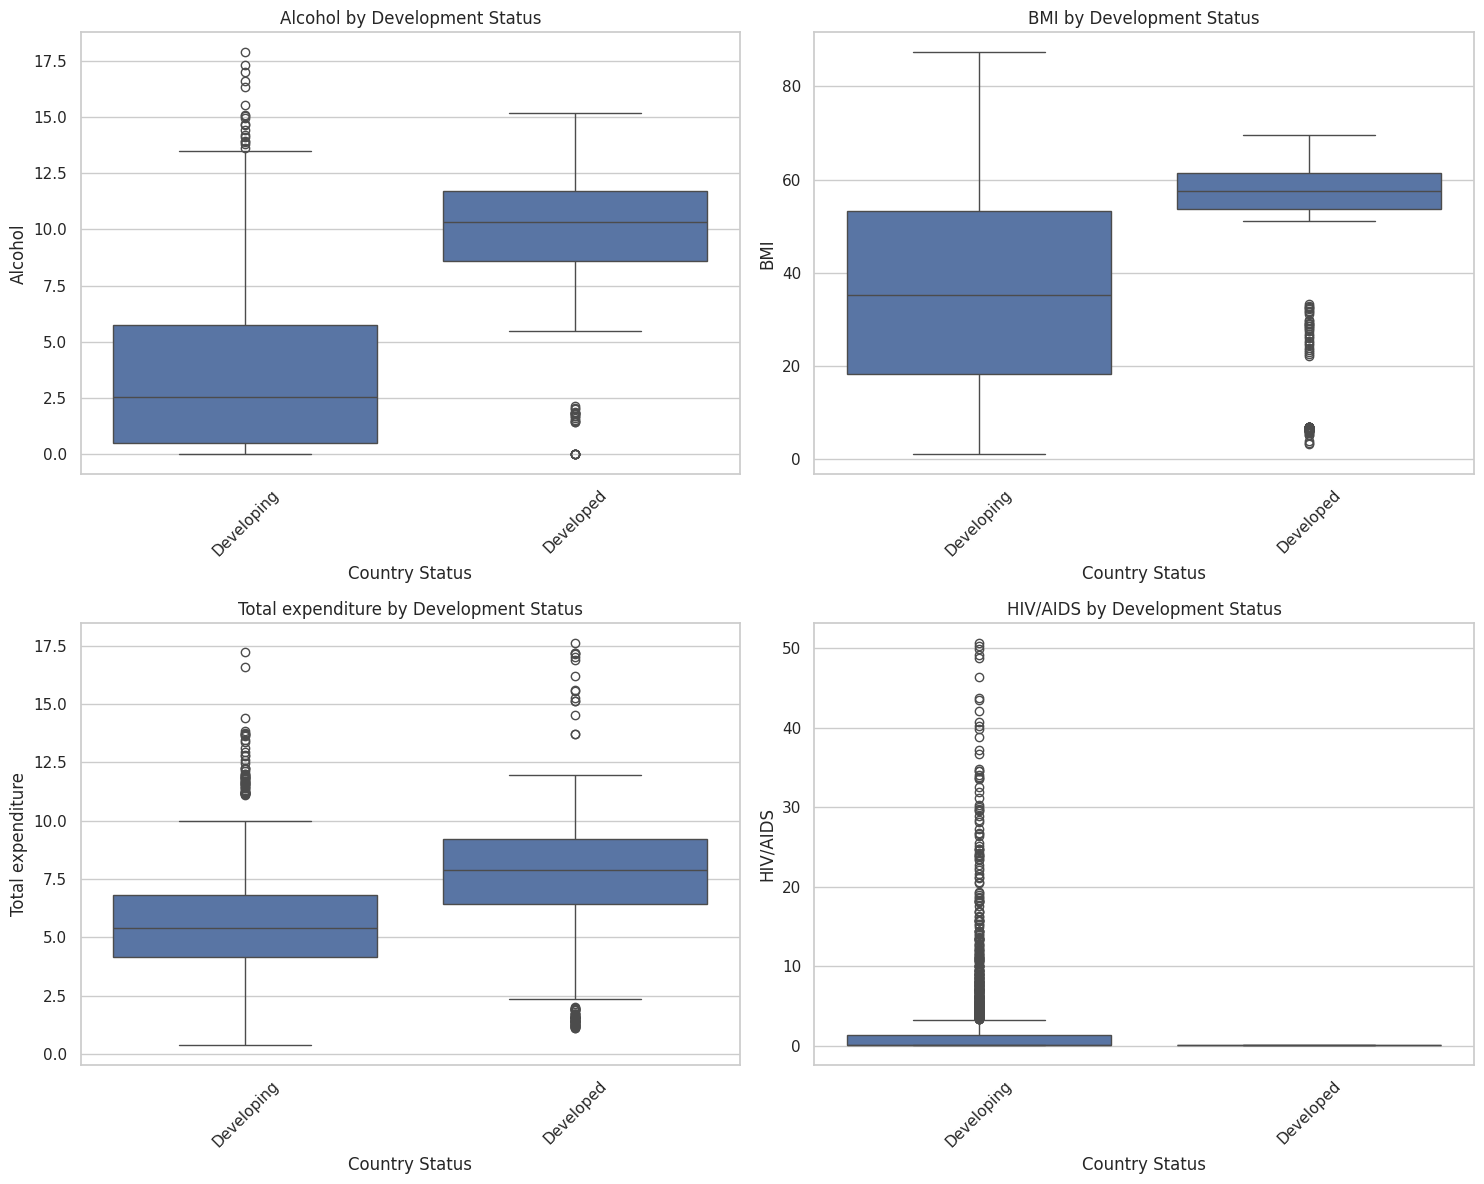

In [248]:
health_indicators = ['Alcohol', 'BMI', 'Total expenditure', 'HIV/AIDS']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
axes = axes.ravel()

for idx, indicator in enumerate(health_indicators):
    sns.boxplot(data=df, x='Status', y=indicator, ax=axes[idx])
    axes[idx].set_title(f'{indicator} by Development Status')
    axes[idx].set_xlabel('Country Status')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()

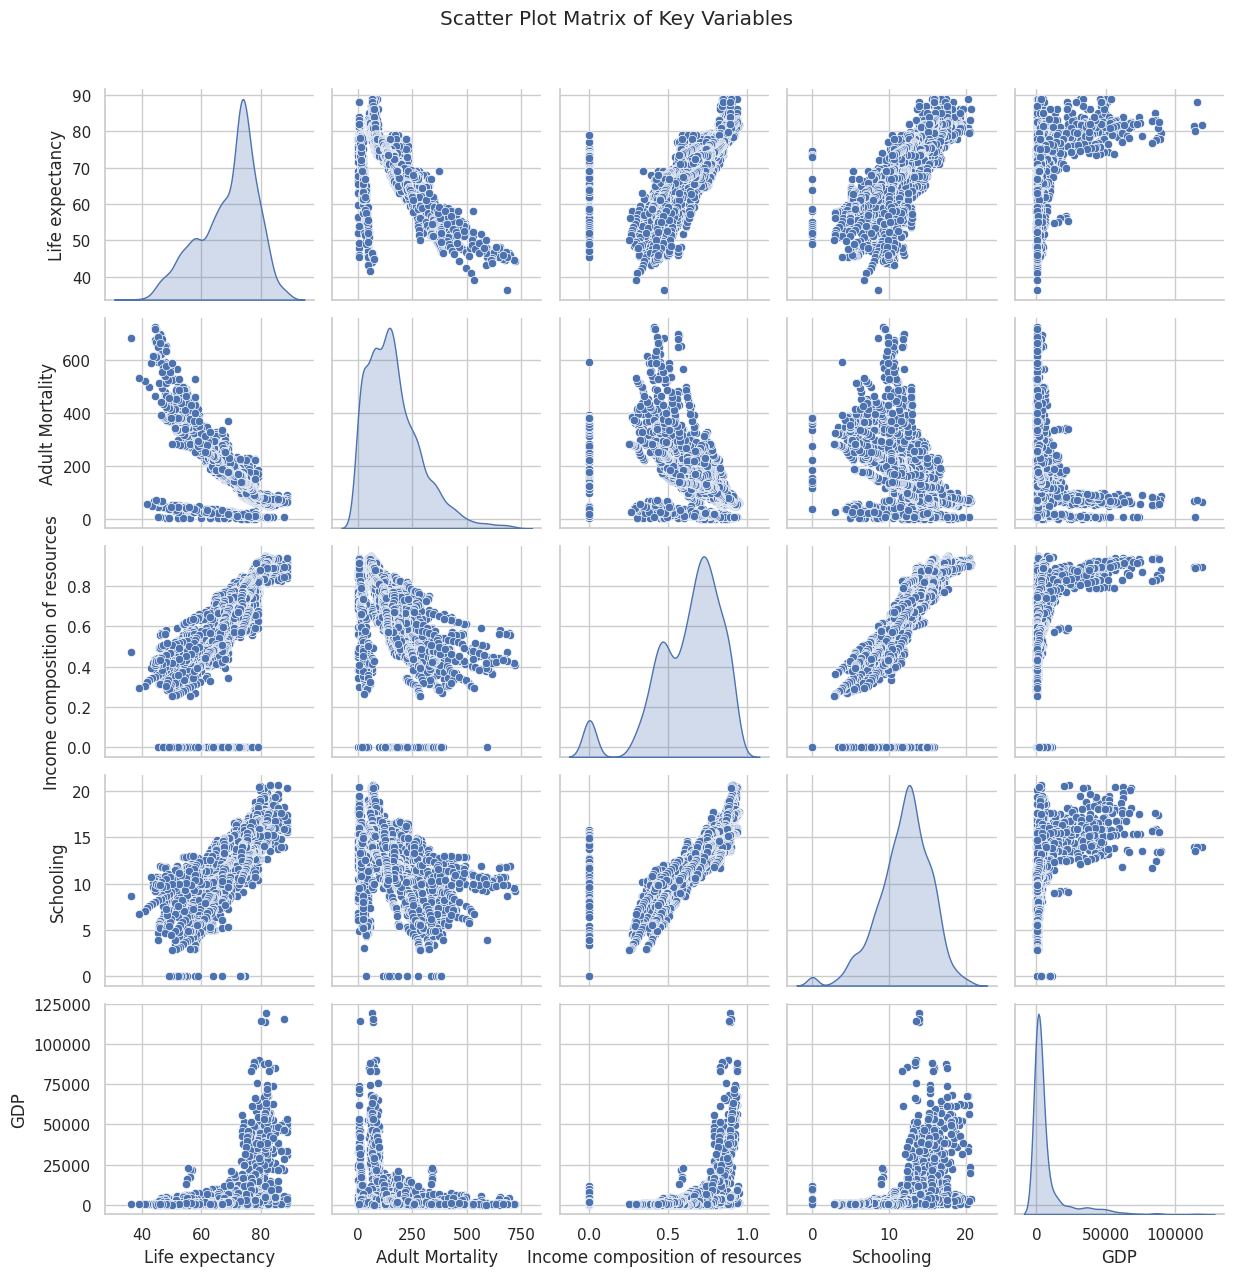

In [249]:
key_vars = ['Life expectancy', 'Adult Mortality', 'Income composition of resources', 'Schooling', 'GDP']
sns.pairplot(df[key_vars], diag_kind='kde')
plt.suptitle('Scatter Plot Matrix of Key Variables', y=1.02)
plt.tight_layout()

<Axes: >

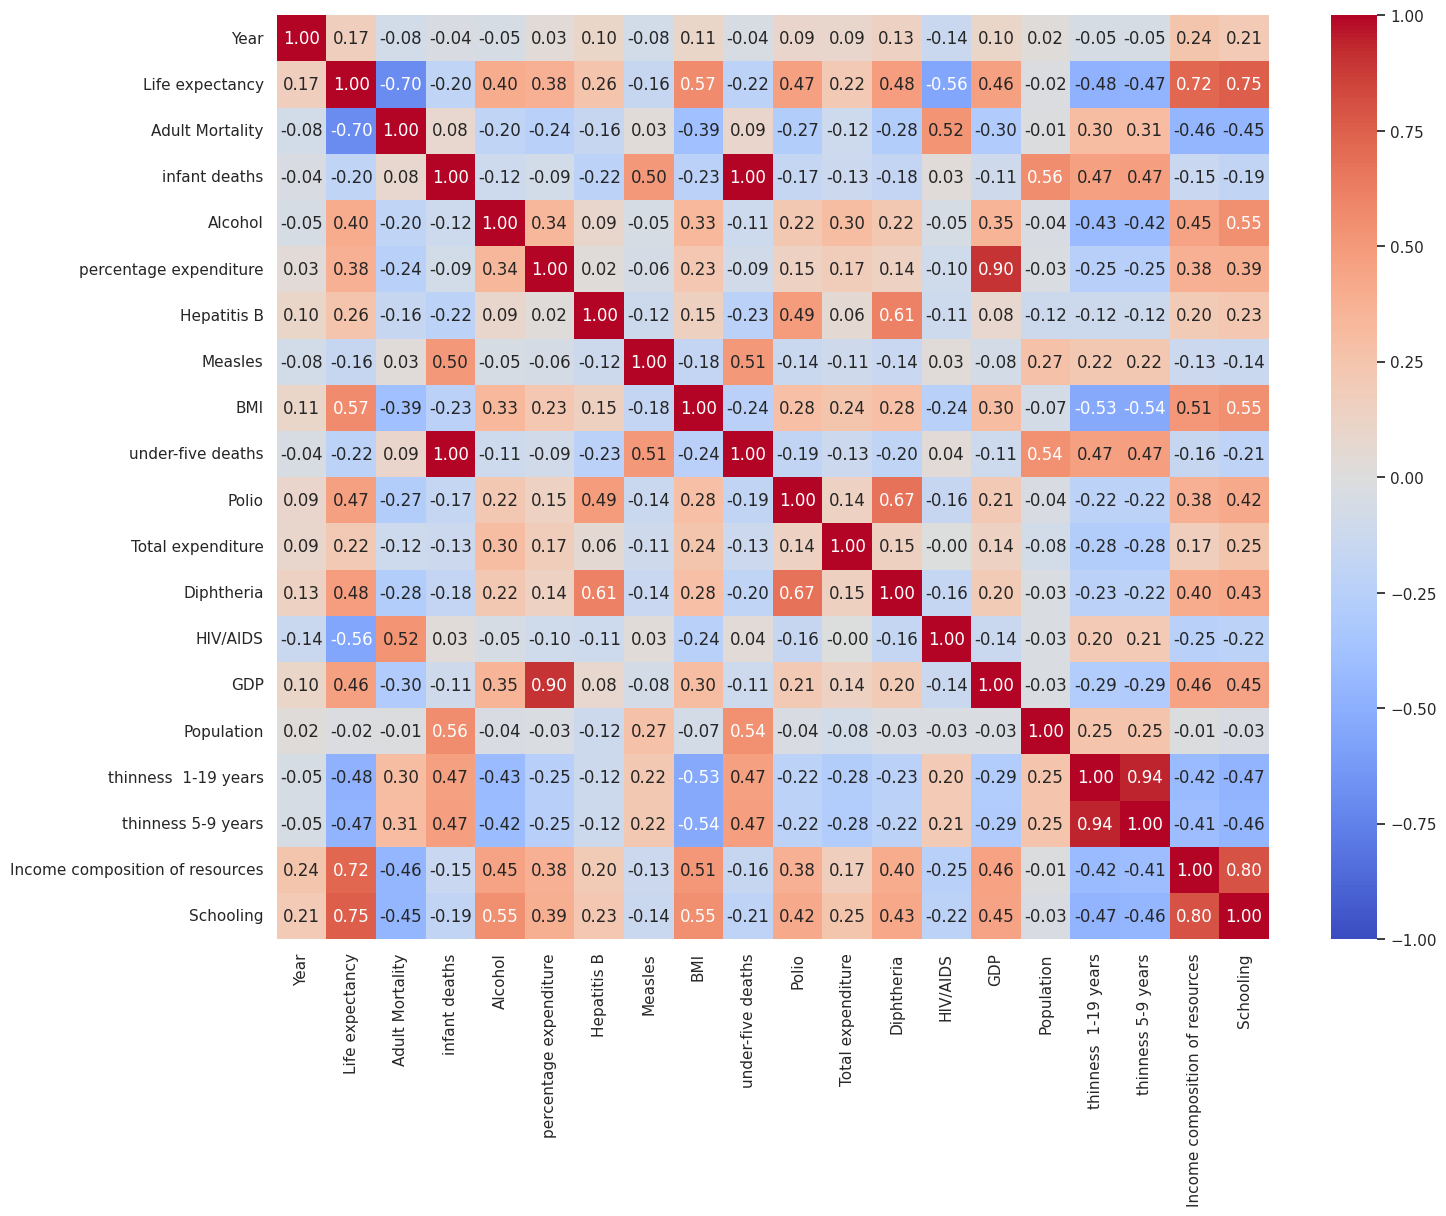

In [250]:
numeric_df = df.select_dtypes(include=[float, int])

plt.figure(figsize=(16, 12))
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)

# Preprocessing

In [113]:
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2, convert_continent_code_to_continent_name
def map_country2continent(cname:str):
  try:
    code = country_alpha2_to_continent_code(country_name_to_country_alpha2(cname))
    continent = convert_continent_code_to_continent_name(code)
    return continent
  except Exception as e:
    if str(e) == '"Invalid Country Alpha-2 code: \'TL\'"':
        continent = 'Asia'
        return continent

df['Country'].replace('Republic of Korea', 'South Korea', inplace=True)
df['Continent'] = df['Country'].apply(map_country2continent)
df.drop(columns=['Country'], inplace=True)

df['Continent'].unique()

/tmp/ipykernel_12195/1474267984.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].replace('Republic of Korea', 'South Korea', inplace=True)


array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', None], dtype=object)

In [114]:
df

Year      Status  Life expectancy  Adult Mortality  infant deaths  \
0     2015  Developing             65.0            263.0             62   
1     2014  Developing             59.9            271.0             64   
2     2013  Developing             59.9            268.0             66   
3     2012  Developing             59.5            272.0             69   
4     2011  Developing             59.2            275.0             71   
...    ...         ...              ...              ...            ...   
2933  2004  Developing             44.3            723.0             27   
2934  2003  Developing             44.5            715.0             26   
2935  2002  Developing             44.8             73.0             25   
2936  2001  Developing             45.3            686.0             25   
2937  2000  Developing             46.0            665.0             24   

      Alcohol  percentage expenditure  Hepatitis B  Measles   BMI  ...  \
0        0.01               71.279624         65.0     1154  19.1  ...   
1        0.01               73.523582         62.0      492  18.6  ...   
2        0.01               73.219243         64.0      430  18.1  ...   
3        0.01               78.184215         67.0     2787  17.6  ...   
4        0.01                7.097109         68.0     3013  17.2  ...   
...       ...                     ...          ...      ...   ...  ...   
2933     4.36                0.000000         68.0       31  27.1  ...   
2934     4.06                0.000000          7.0      998  26.7  ...   
2935     4.43                0.000000         73.0      304  26.3  ...   
2936     1.72                0.000000         76.0      529  25.9  ...   
2937     1.68                0.000000         79.0     1483  25.5  ...   

      Total expenditure  Diphtheria  HIV/AIDS         GDP  Population  \
0                  8.16        65.0       0.1  584.259210  33736494.0   
1                  8.18        62.0       0.1  612.696514    327582.0   
2                  8.13        64.0       0.1  631.744976  31731688.0   
3                  8.52        67.0       0.1  669.959000   3696958.0   
4                  7.87        68.0       0.1   63.537231   2978599.0   
...                 ...         ...       ...         ...         ...   
2933               7.13        65.0      33.6  454.366654  12777511.0   
2934               6.52        68.0      36.7  453.351155  12633897.0   
2935               6.53        71.0      39.8   57.348340    125525.0   
2936               6.16        75.0      42.1  548.587312  12366165.0   
2937               7.10        78.0      43.5  547.358878  12222251.0   

      thinness  1-19 years  thinness 5-9 years  \
0                     17.2                17.3   
1                     17.5                17.5   
2                     17.7                17.7   
3                     17.9                18.0   
4                     18.2                18.2   
...                    ...                 ...   
2933                   9.4                 9.4   
2934                   9.8                 9.9   
2935                   1.2                 1.3   
2936                   1.6                 1.7   
2937                  11.0                11.2   

      Income composition of resources  Schooling  Continent  
0                               0.479       10.1       Asia  
1                               0.476       10.0       Asia  
2                               0.470        9.9       Asia  
3                               0.463        9.8       Asia  
4                               0.454        9.5       Asia  
...                               ...        ...        ...  
2933                            0.407        9.2     Africa  
2934                            0.418        9.5     Africa  
2935                            0.427       10.0     Africa  
2936                            0.427        9.8     Africa  
2937                            0.434        9.8     Afr

In [115]:
# Primeira divisão treino/teste
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)


In [116]:
# Label Encoding para variáveis categóricas

#encoding continent
continent_enc = LabelEncoder()
df_train['Continent'] = continent_enc.fit_transform(df_train['Continent'])
df_test['Continent'] = continent_enc.transform(df_test['Continent'])

#encoding year
year_enc = LabelEncoder()
df_train['Year'] = year_enc.fit_transform(df_train['Year'])
df_test['Year'] = year_enc.transform(df_test['Year'])

#encoding status
status_enc = LabelEncoder()
df_train['Status'] = status_enc.fit_transform(df_train['Status'])
df_test['Status'] = status_enc.transform(df_test['Status'])

In [117]:
df_test

Year  Status  Life expectancy  Adult Mortality  infant deaths  Alcohol  \
2546     6       1             73.7            123.0              8     0.97   
650      6       0             75.9            113.0              0    11.83   
1740     7       1             74.2            125.0              0     4.98   
177     14       1             76.8              7.0              0     1.57   
1377     0       1             51.9            428.0             77     1.51   
...    ...     ...              ...              ...            ...      ...   
859      6       1             59.7            336.0              7     0.97   
1405     4       1             73.5             91.0              0     0.02   
962     15       1             61.1            262.0              3      NaN   
2658     6       1             69.6            188.0              0     6.35   
2272     8       1             74.0            132.0              1     9.54   

      percentage expenditure  Hepatitis B  Measles   BMI  ...  \
2546              122.652333         83.0      517  48.5  ...   
650              1555.651986          NaN        1  58.1  ...   
1740              678.518894          9.0        0  57.2  ...   
177               367.255674         98.0       46  62.9  ...   
1377                0.681686          NaN    21002  14.4  ...   
...                      ...          ...      ...   ...  ...   
859                10.602698         94.0      128  14.3  ...   
1405             1731.073528         94.0       23  65.9  ...   
962                 0.000000         97.0       71  27.3  ...   
2658              103.371069         89.0        0  38.4  ...   
2272               96.332379         93.0        2  55.8  ...   

      Total expenditure  Diphtheria  HIV/AIDS           GDP  Population  \
2546               3.78         8.0       0.1   1762.246170  18914977.0   
650                6.95        96.0       0.1  11363.418450       444.0   
1740               6.74        92.0       0.1   5957.145693    615875.0   
177                4.98        98.0       0.1  24983.379200         NaN   
1377               4.68        82.0      18.1     43.979713   3145483.0   
...                 ...         ...       ...           ...         ...   
859                3.30        94.0       1.4    297.828588    466648.0   
1405               2.76        98.0       0.1  26921.827800         NaN   
962                 NaN        97.0       1.7           NaN         NaN   
2658               4.49        92.0       0.6   1495.963370    133144.0   
2272               1.50        95.0       0.1    671.773913    735222.0   

      thinness  1-19 years  thinness 5-9 years  \
2546                   6.4                 6.3   
650                    1.8                 1.8   
1740                   2.1                 2.2   
177                    6.1                 6.0   
1377                   9.2                 9.1   
...                    ...                 ...   
859                    9.3                 9.3   
1405                   3.2                 3.0   
962                    7.3                 7.2   
2658                   6.2                 6.6   
2272                   2.3                 2.4   

      Income composition of resources  Schooling  Continent  
2546                            0.636       11.4          1  
650                             0.783       13.9          2  
1740                            0.762       13.6          2  
177                             0.820       14.5          1  
1377                            0.448        8.4          0  
...                               ...        ...        ...  
859                             0.405        5.3          0  
1405                            0.791       14.4          1  
962                             0.450        8.9          0  
2658                            0.751       12.3          3  
2272                            0.749       13.5          2  

[588 rows x 22 co

In [118]:
# Separar features e target
X_train = df_train.drop(columns=['Life expectancy'])
y_train = df_train['Life expectancy']
X_test = df_test.drop(columns=['Life expectancy'])
y_test = df_test['Life expectancy']

In [120]:
# Definir colunas para preprocessamento
num_attribs = df_train[num_col].drop(columns=['Year', 'Life expectancy']).columns
cat_attribs = df_train[['Continent', 'Status']].columns

In [122]:
# Criar preprocessadores
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent'))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', cat_pipeline, cat_attribs)
])

In [134]:
X_train_preprocessed =pd.DataFrame(preprocessor.fit_transform(X_train))
X_test_preprocessed =pd.DataFrame(preprocessor.transform(X_test))

y_train.fillna(y_train.median(), inplace=True)
y_test.fillna(y_test.median(), inplace=True)

# Spot-checking

In [178]:
models = [
    SVR(),
    RandomForestRegressor(random_state=42),
    LinearRegression(),
    DecisionTreeRegressor(random_state=42),
]


results = {}
scoring = {
    'RMSE': 'neg_root_mean_squared_error',  # Vamos calcular RMSE a partir do MSE
    'R2': 'r2'
}

for model in models:
    model_name = model.__class__.__name__
    
    # Cross-validation
    cv_results = cross_validate(
        model,
        X_train_preprocessed,
        y_train,
        cv=10,
        scoring=scoring,
        return_train_score=True,
        n_jobs=-1
    )
    cv_results['test_RMSE'] = -cv_results['test_RMSE']
    
    # Treinar modelo final
    model.fit(X_train_preprocessed, y_train)
    
    # Predições no conjunto de teste
    y_pred = model.predict(X_test_preprocessed)
    
    # Calcular apenas RMSE e R² para o conjunto de teste
    test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    test_r2 = r2_score(y_test, y_pred)
    
    results[model_name] = {
        # Métricas de CV (média e desvio padrão)
        'cv_rmse_mean': cv_results['test_RMSE'].mean(),
        'cv_rmse_std': cv_results['test_RMSE'].std(),
        'cv_rmse': cv_results['test_RMSE'],
        'cv_r2_mean': cv_results['test_R2'].mean(),
        'cv_r2_std': cv_results['test_R2'].std(),
        'cv_r2': cv_results['test_R2'],
        
        # Métricas no conjunto de teste
        'test_rmse': test_rmse,
        'test_r2': test_r2,

        # Predições e valores reais
        'y_test': y_test,
        'y_pred': y_pred,
        
        # Modelo treinado
        'model': model
    }

In [203]:
df_results = pd.DataFrame(columns=['Modelo', 'CV RMSE', 'CV R²', 'Teste RMSE', 'Teste R²'])

for model_name, metrics in results.items():
    df_results = pd.concat([df_results, pd.DataFrame({
        'Modelo': [model_name],
        'CV RMSE': [f"{metrics['cv_rmse_mean']:.4f} ± {metrics['cv_rmse_std']:.4f}"],
        'CV R²': [f"{metrics['cv_r2_mean']:.4f} ± {metrics['cv_r2_std']:.4f}"],
        'Teste RMSE': [f"{metrics['test_rmse']:.4f}"],
        'Teste R²': [f"{metrics['test_r2']:.4f}"]
    })], ignore_index=True)

df_results

Modelo          CV RMSE            CV R² Teste RMSE Teste R²
0                    SVR  3.6555 ± 0.1725  0.8520 ± 0.0154     3.2737   0.8763
1  RandomForestRegressor  1.9786 ± 0.2190  0.9561 ± 0.0104     1.6470   0.9687
2       LinearRegression  4.0447 ± 0.1653  0.8187 ± 0.0191     3.8691   0.8272
3  DecisionTreeRegressor  2.8965 ± 0.2094  0.9067 ± 0.0149     2.5506   0.9249

In [200]:
for model_name, metrics in results.items():
    print(metrics['cv'])

{'SVR': {'cv_rmse_mean': np.float64(3.6555086687686056), 'cv_rmse_std': np.float64(0.17246933495415379), 'cv_rmse': array([3.73024232, 3.67727128, 3.53340428, 3.62059384, 3.59179791,
       3.49260062, 3.79121919, 4.00619362, 3.76011583, 3.3516478 ]), 'cv_r2_mean': np.float64(0.8519891875654515), 'cv_r2_std': np.float64(0.015376281556695903), 'cv_r2': array([0.86681054, 0.85665406, 0.87334584, 0.85559803, 0.8448497 ,
       0.85100674, 0.83149585, 0.82701657, 0.84048779, 0.87262675]), 'test_rmse': np.float64(3.2737003779055183), 'test_r2': 0.8763282798421903, 'y_test': 2546    73.7
650     75.9
1740    74.2
177     76.8
1377    51.9
        ... 
859     59.7
1405    73.5
962     61.1
2658    69.6
2272    74.0
Name: Life expectancy, Length: 588, dtype: float64, 'y_pred': array([67.48157144, 76.22169474, 74.94033544, 76.76944999, 51.77876241,
       57.54159426, 69.86609707, 73.74788628, 77.25753456, 52.46629464,
       49.06545317, 59.16641835, 59.20276161, 72.72657666, 70.48529025,
   

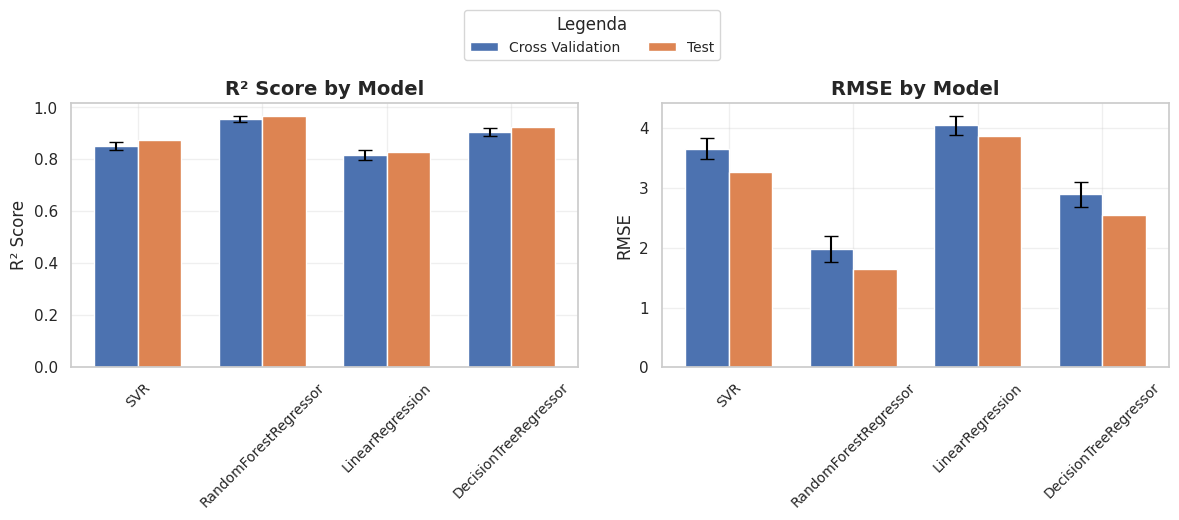

In [179]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=False)

# Dados para plotting
models = list(results.keys())
r2_cv = [results[m]['cv_r2_mean'] for m in models]
r2_cv_std = [results[m]['cv_r2_std'] for m in models]
r2_test = [results[m]['test_r2'] for m in models]
rmse_cv = [results[m]['cv_rmse_mean'] for m in models]
rmse_cv_std = [results[m]['cv_rmse_std'] for m in models]
rmse_test = [results[m]['test_rmse'] for m in models]

# Plot 1: R² Score
x = np.arange(len(models))
width = 0.35

bar1_r2 = ax1.bar(x - width/2, r2_cv, width, label='Cross Validation',
                  yerr=r2_cv_std, capsize=5, ecolor='black')
bar2_r2 = ax1.bar(x + width/2, r2_test, width, label='Test')
ax1.set_title('R² Score by Model', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(models, rotation=45, fontsize=10)
ax1.set_ylabel("R² Score", fontsize=12)
ax1.grid(True, alpha=0.3)

# Plot 2: RMSE
bar1_rmse = ax2.bar(x - width/2, rmse_cv, width, label='Cross Validation',
                    yerr=rmse_cv_std, capsize=5, ecolor='black')
bar2_rmse = ax2.bar(x + width/2, rmse_test, width, label='Test')
ax2.set_title('RMSE by Model', fontsize=14, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(models, rotation=45, fontsize=10)
ax2.set_ylabel("RMSE", fontsize=12)
ax2.grid(True, alpha=0.3)

# Criar uma única legenda compartilhada
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, 
           title="Legenda", 
           title_fontsize=12, 
           fontsize=10, 
           loc='upper center', 
           bbox_to_anchor=(0.5, 1.05), 
           ncol=len(labels))

plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Para acomodar a legenda no topo

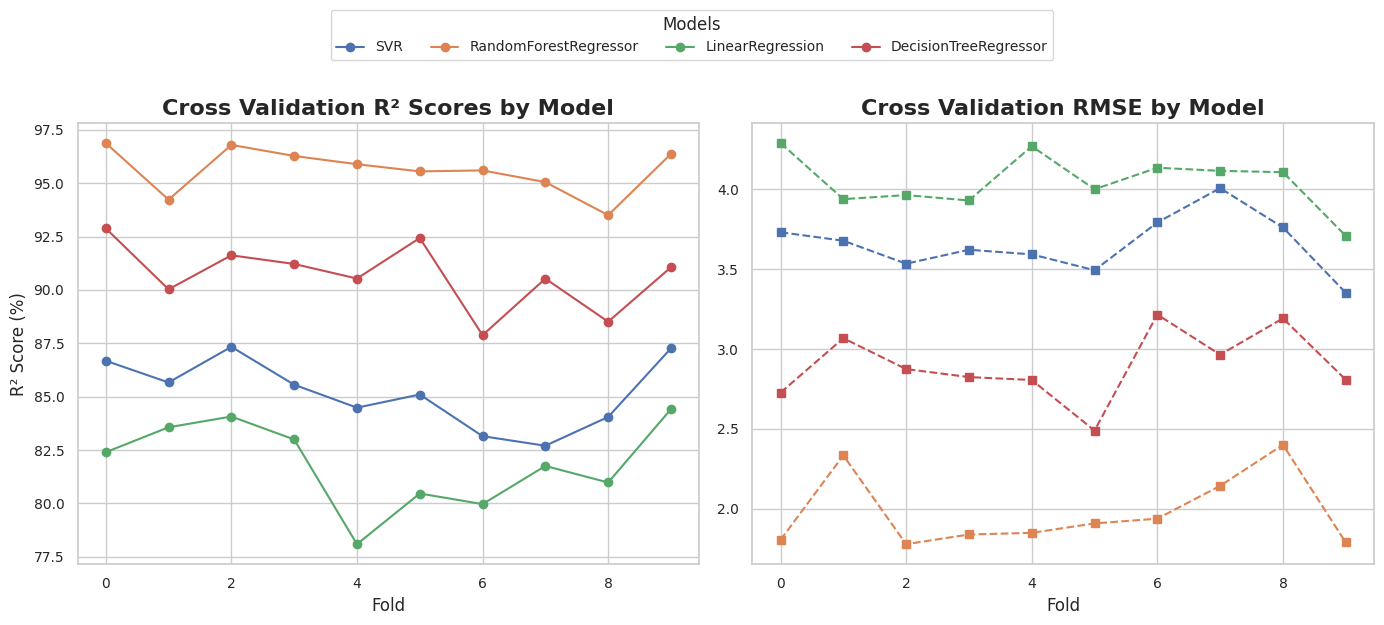

In [180]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Gráfico de R²
for model_name, result in results.items():
    ax1.plot(np.arange(len(result['cv_r2'])), 
             result['cv_r2'] * 100, 
             marker="o", 
             label=model_name)
ax1.set_title("Cross Validation R² Scores by Model", fontsize=16, fontweight="bold")
ax1.set_xlabel("Fold", fontsize=12)
ax1.set_ylabel("R² Score (%)", fontsize=12)
ax1.tick_params(axis="x", labelsize=10)
ax1.tick_params(axis="y", labelsize=10)

# Gráfico de RMSE
for model_name, result in results.items():
    ax2.plot(np.arange(len(result['cv_rmse'])), 
             result['cv_rmse'], 
             marker="s", 
             linestyle="--", 
             label=model_name)
ax2.set_title("Cross Validation RMSE by Model", fontsize=16, fontweight="bold")
ax2.set_xlabel("Fold", fontsize=12)
ax2.tick_params(axis="x", labelsize=10)
ax2.tick_params(axis="y", labelsize=10)

# Adicionar uma única legenda compartilhada
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, 
           title="Models", 
           title_fontsize=12, 
           fontsize=10, 
           loc='upper center', 
           bbox_to_anchor=(0.5, 1.05), 
           ncol=len(labels))

plt.tight_layout()
plt.subplots_adjust(top=0.85)

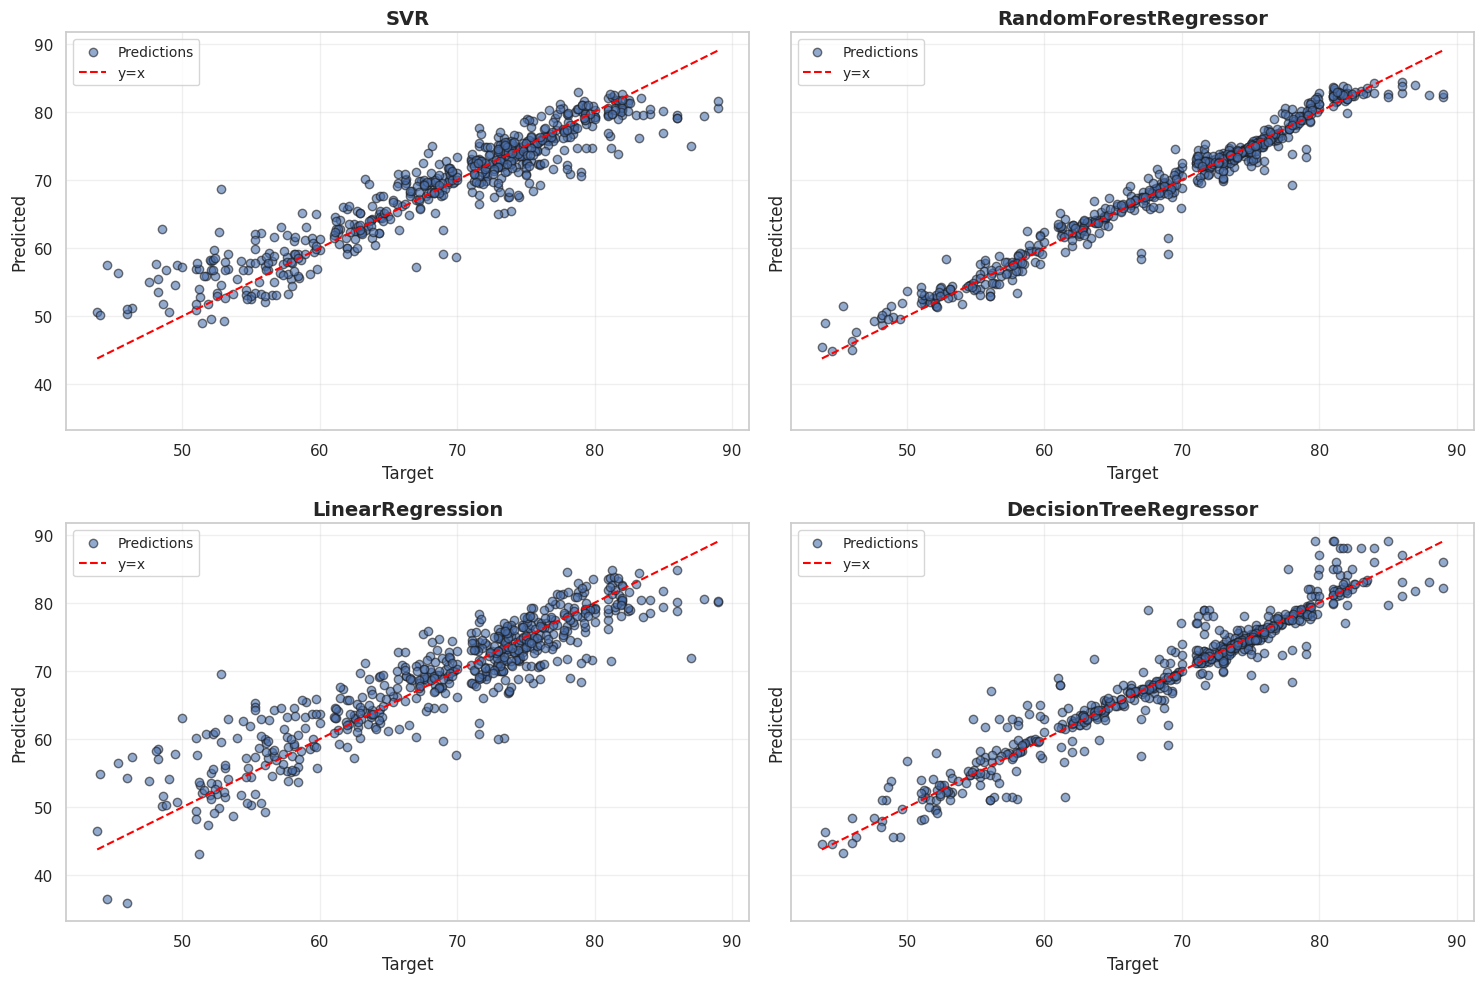

In [181]:
# Configurar número de linhas e colunas para os subplots
num_models = len(results)
cols = 2  # Dois gráficos por linha
rows = math.ceil(num_models / cols)

# Criar scatterplots com base nos resultados
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows), sharey=True)
axes = axes.flatten()  # Garantir que seja um array 1D para fácil iteração

for ax, (model_name, result) in zip(axes, results.items()):
    # Valores reais e preditos do conjunto de teste
    y_test = result['y_test']  # Armazene isso em `results` durante o loop
    y_pred = result['y_pred']  # Idem
    
    # Scatterplot
    ax.scatter(y_test, y_pred, alpha=0.6, edgecolor='k', label="Predictions")
    ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 
            color='red', linestyle='--', label="y=x", linewidth=1.5)
    
    ax.set_title(model_name, fontsize=14, fontweight="bold")
    ax.set_xlabel("Target", fontsize=12)
    ax.set_ylabel("Predicted", fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.legend(fontsize=10)

# Remover eixos para quaisquer subplots extras
for i in range(len(results), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

## Best Model:

In [192]:
best_model = None
best_metrics = None
best_score = float('inf')

for model_name, metrics in results.items():
    # Quanto menor o RMSE e maior o R², melhor o modelo
    # Usamos 1 - R² para ter uma métrica onde menor = melhor
    score = metrics['cv_rmse_mean'] * (1 - metrics['cv_r2_mean'])
    
    if score < best_score:
        best_score = score
        best_model = model_name
        best_metrics = {
            'CV RMSE (média)': round(metrics['cv_rmse_mean'], 4),
            'CV R² (média)': round(metrics['cv_r2_mean'], 4),
            'Test RMSE': round(metrics['test_rmse'], 4),
            'Test R²': round(metrics['test_r2'], 4)
        }

In [193]:
print(f"Best Model: {best_model}")
print("\nMetrics")
for metric, value in best_metrics.items():
    print(f"{metric}: {value}")

Best Model: RandomForestRegressor

Metrics
CV RMSE (média): 1.9786
CV R² (média): 0.9561
Test RMSE: 1.647
Test R²: 0.9687


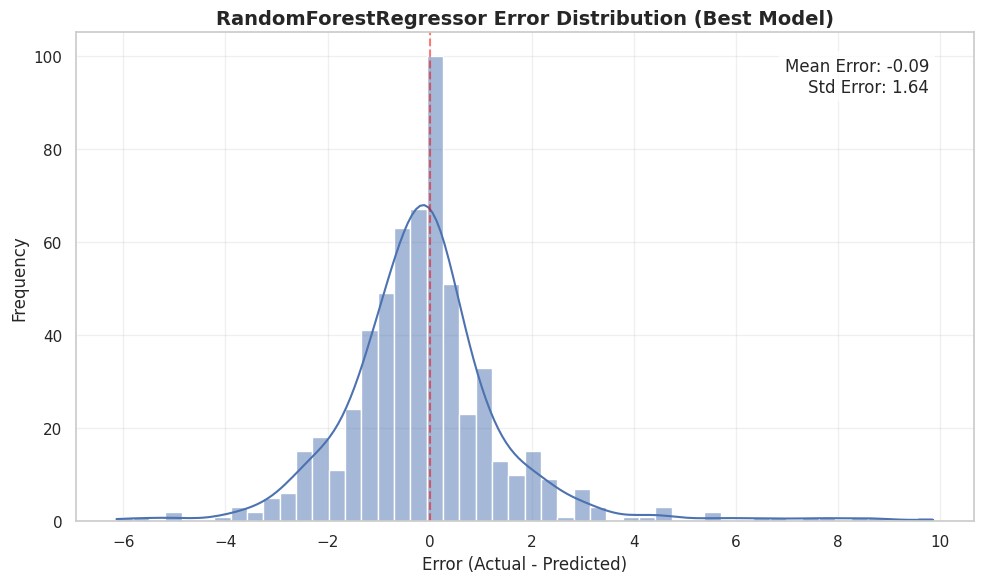

In [199]:
plt.figure(figsize=(10, 6))

errors = results[best_model]['y_test'] - results[best_model]['y_pred']

sns.histplot(errors, kde=True)

plt.axvline(x=0, color='red', linestyle='--', alpha=0.5)
plt.title(f'{best_model} Error Distribution (Best Model)', fontsize=14, fontweight='bold')
plt.xlabel('Error (Actual - Predicted)')
plt.ylabel('Frequency')

plt.text(0.95, 0.95, 
         f'Mean Error: {np.mean(errors):.2f}\nStd Error: {np.std(errors):.2f}',
         transform=plt.gca().transAxes,
         verticalalignment='top',
         horizontalalignment='right',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Spot Checking (ANTIGO)

## Pre-processing with PCA

In [ ]:
num_pcs_considered = 3
num_features_selected = 5
top_features = pd.DataFrame()

df = df.dropna()

for pc in loadings.columns[:num_pcs_considered]:
    pc_loadings = loadings[pc].abs()
    top_features[pc] = pc_loadings

aggregated_importance = top_features.sum(axis=1).sort_values(ascending=False)

print(f"Top {num_features_selected} features based on the sum of loadings across the first {num_pcs_considered} PCs:")
print(aggregated_importance.head(num_features_selected))

selected_features = aggregated_importance.head(num_features_selected).index.to_list()


Top 5 features based on the sum of loadings across the first 3 PCs:
Diphtheria                0.784041
percentage expenditure    0.764353
Polio                     0.742839
GDP                       0.739350
under-five deaths         0.710032
dtype: float64


## Random Forest

Mean Squared Error: 27.194687060606046


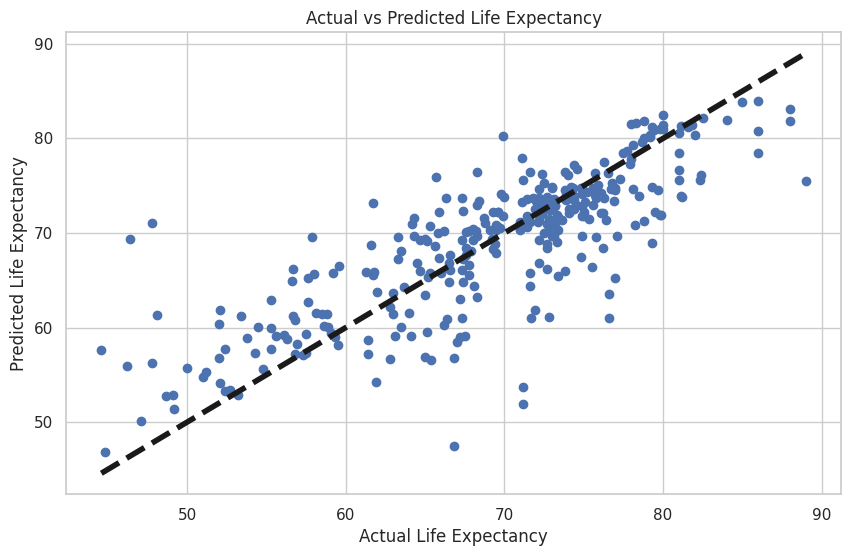

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

random_state = 1

X = df[selected_features]
y = df['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

model = RandomForestRegressor(n_estimators=100, random_state=random_state)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

feature_importances = model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.show()

## Linear Regression

Mean Squared Error: 54.021744247168144


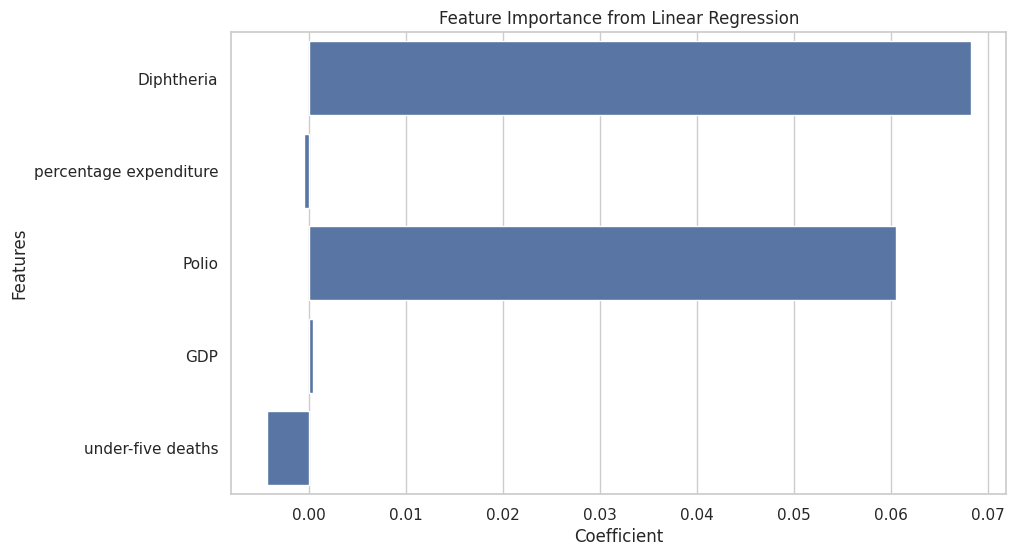

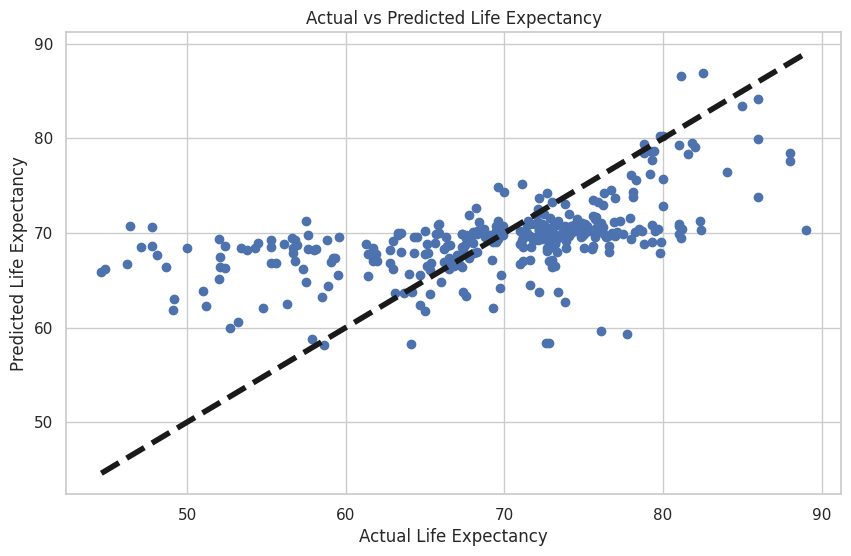

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

random_state = 1

X = df[selected_features]
y = df['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

coefficients = model.coef_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=feature_names)
plt.title('Feature Importance from Linear Regression')
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.show()

## SVM

Mean Squared Error: 212.31462952089151


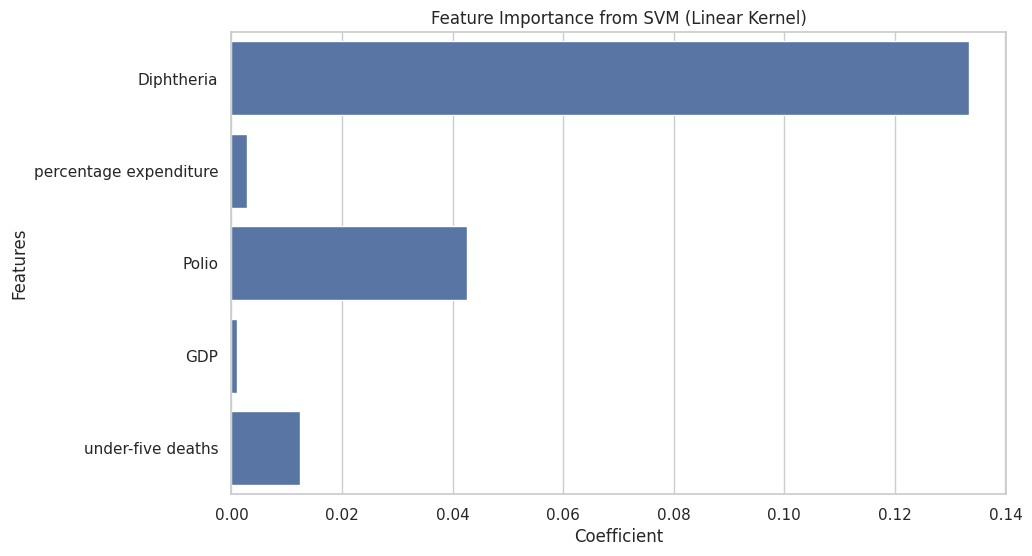

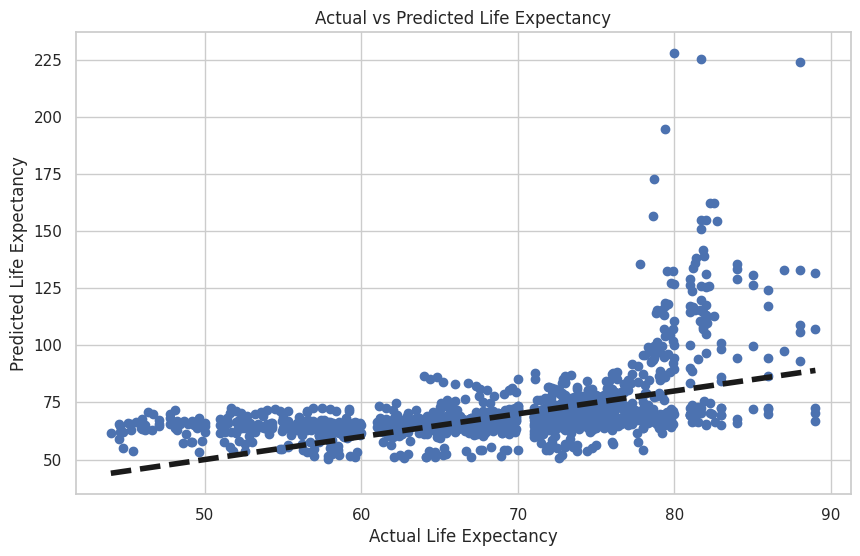

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

random_state = 1

X = df[selected_features]
y = df['Life expectancy']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=random_state)

model = SVR(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

coefficients = model.coef_[0]
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients, y=feature_names)
plt.title('Feature Importance from SVM (Linear Kernel)')
plt.xlabel('Coefficient')
plt.ylabel('Features')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title('Actual vs Predicted Life Expectancy')
plt.show()